In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab
import math
from scipy import stats
from scipy.stats import linregress
import scipy.stats as sts
from sklearn import datasets

In [21]:
sat_df = pd.read_csv('demo_sat.csv')
sat_df.set_index('CDS_CODE')

#Drop redundant columns
sat_df.drop(columns=['Unnamed: 0'], inplace=True)

#Fill last of the Null Values with zeros
sat_df.fillna(0,inplace=True)

sat_df.columns


Index(['CDS_CODE', 'RTYPE', 'SCHOOL', 'DISTRICT', 'COUNTY', '#_12_ENROLL',
       '#_SAT_TESTS', '#_ELA_PASS', 'PCNT_ELA_PASS', '#_MATH_PASS',
       'PCNT_MATH_PASS', '#_BOTH_PASS', 'PCNT_BOTH_PASS', 'OTHER',
       'AMERICAN_INDIAN', 'ASIAN', 'PACIFIC_ISLANDER', 'FILIPINO', 'LATINO',
       'AFRICAN_AMERICAN', 'WHITE', 'MULTI_RACE'],
      dtype='object')

In [22]:
#Verify there are more Nulls
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 22 columns):
CDS_CODE            1301 non-null int64
RTYPE               1301 non-null object
SCHOOL              1301 non-null object
DISTRICT            1301 non-null object
COUNTY              1301 non-null object
#_12_ENROLL         1301 non-null int64
#_SAT_TESTS         1301 non-null int64
#_ELA_PASS          1301 non-null int64
PCNT_ELA_PASS       1301 non-null float64
#_MATH_PASS         1301 non-null int64
PCNT_MATH_PASS      1301 non-null float64
#_BOTH_PASS         1301 non-null int64
PCNT_BOTH_PASS      1301 non-null float64
OTHER               1301 non-null float64
AMERICAN_INDIAN     1301 non-null float64
ASIAN               1301 non-null float64
PACIFIC_ISLANDER    1301 non-null float64
FILIPINO            1301 non-null float64
LATINO              1301 non-null float64
AFRICAN_AMERICAN    1301 non-null float64
WHITE               1301 non-null float64
MULTI_RACE          1301 no

In [23]:
#created a list of total students at each school
sat_df['STUDENT_TOTAL'] = sat_df['OTHER'] + sat_df['AMERICAN_INDIAN'] + sat_df['ASIAN'] + sat_df['PACIFIC_ISLANDER'] + sat_df['FILIPINO']  + sat_df['LATINO'] + sat_df['LATINO'] + sat_df['AFRICAN_AMERICAN'] + sat_df['WHITE'] + sat_df['MULTI_RACE']
sat_df.head(1)

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_SAT_TESTS,#_ELA_PASS,PCNT_ELA_PASS,#_MATH_PASS,...,OTHER,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE,STUDENT_TOTAL
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,88,44,50.0,19,...,0.0,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0,615.0


In [24]:
#combined 'other' groups #combined 'asians' to match census data
sat_df['OTHER_TOTAL'] = sat_df['OTHER'] + sat_df['MULTI_RACE']
sat_df['ASIANS_TOTAL'] = sat_df['ASIAN'] + sat_df['FILIPINO']
sat_df.head(1)

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_SAT_TESTS,#_ELA_PASS,PCNT_ELA_PASS,#_MATH_PASS,...,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE,STUDENT_TOTAL,OTHER_TOTAL,ASIANS_TOTAL
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,88,44,50.0,19,...,8.0,5.0,1.0,212.0,150.0,18.0,4.0,615.0,4.0,9.0


In [25]:
#create percentages of students at schools by ethnicity, rounded by 2
sat_df['OTHER_PERCENT'] = round(sat_df['OTHER_TOTAL'] / sat_df['STUDENT_TOTAL']*100, 2)
sat_df['ASIANS_PERCENT'] = round(sat_df['ASIANS_TOTAL'] / sat_df['STUDENT_TOTAL']*100, 2)
sat_df['PACIFIC_ISLANDER_PERCENT'] = round(sat_df['PACIFIC_ISLANDER'] / sat_df['STUDENT_TOTAL']*100, 2)
sat_df['AMERICAN_INDIAN_PERCENT'] = round(sat_df['AMERICAN_INDIAN'] / sat_df['STUDENT_TOTAL']*100, 2)
sat_df['LATINO_PERCENT'] = round(sat_df['LATINO'] / sat_df['STUDENT_TOTAL']*100, 2)
sat_df['AFRICAN_AMERICAN_PERCENT'] = round(sat_df['AFRICAN_AMERICAN'] / sat_df['STUDENT_TOTAL']*100, 2)
sat_df['WHITE_PERCENT'] = round(sat_df['WHITE'] / sat_df['STUDENT_TOTAL']*100, 2)
sat_df.head(1)

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_SAT_TESTS,#_ELA_PASS,PCNT_ELA_PASS,#_MATH_PASS,...,STUDENT_TOTAL,OTHER_TOTAL,ASIANS_TOTAL,OTHER_PERCENT,ASIANS_PERCENT,PACIFIC_ISLANDER_PERCENT,AMERICAN_INDIAN_PERCENT,LATINO_PERCENT,AFRICAN_AMERICAN_PERCENT,WHITE_PERCENT
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,88,44,50.0,19,...,615.0,4.0,9.0,0.65,1.46,0.81,0.81,34.47,24.39,2.93


In [26]:
#Aded Latino Majority for categorical data to be used later. 39 is the CA population average for Latinos
sat_df['LATINO_MAJORITY'] = sat_df.LATINO_PERCENT > 39
sat_df['LATINO_MAJORITY'].value_counts()

False    800
True     501
Name: LATINO_MAJORITY, dtype: int64

In [27]:
#remove columns not to be used in analysis
sat_df.columns


Index(['CDS_CODE', 'RTYPE', 'SCHOOL', 'DISTRICT', 'COUNTY', '#_12_ENROLL',
       '#_SAT_TESTS', '#_ELA_PASS', 'PCNT_ELA_PASS', '#_MATH_PASS',
       'PCNT_MATH_PASS', '#_BOTH_PASS', 'PCNT_BOTH_PASS', 'OTHER',
       'AMERICAN_INDIAN', 'ASIAN', 'PACIFIC_ISLANDER', 'FILIPINO', 'LATINO',
       'AFRICAN_AMERICAN', 'WHITE', 'MULTI_RACE', 'STUDENT_TOTAL',
       'OTHER_TOTAL', 'ASIANS_TOTAL', 'OTHER_PERCENT', 'ASIANS_PERCENT',
       'PACIFIC_ISLANDER_PERCENT', 'AMERICAN_INDIAN_PERCENT', 'LATINO_PERCENT',
       'AFRICAN_AMERICAN_PERCENT', 'WHITE_PERCENT', 'LATINO_MAJORITY'],
      dtype='object')

In [28]:
#remove columns not to be used in analysis
sat_df.drop(columns = ['#_ELA_PASS',
                       '#_MATH_PASS',
                       '#_BOTH_PASS', 
                       'OTHER',
                       'AMERICAN_INDIAN', 
                       'ASIAN', 
                       'PACIFIC_ISLANDER', 
                       'FILIPINO', 
                       'LATINO',
                       'AFRICAN_AMERICAN',
                       'WHITE',
                       'MULTI_RACE',
                       'OTHER_TOTAL', 
                       'ASIANS_TOTAL',
                       'MULTI_RACE'],inplace=True)
sat_df.columns

Index(['CDS_CODE', 'RTYPE', 'SCHOOL', 'DISTRICT', 'COUNTY', '#_12_ENROLL',
       '#_SAT_TESTS', 'PCNT_ELA_PASS', 'PCNT_MATH_PASS', 'PCNT_BOTH_PASS',
       'STUDENT_TOTAL', 'OTHER_PERCENT', 'ASIANS_PERCENT',
       'PACIFIC_ISLANDER_PERCENT', 'AMERICAN_INDIAN_PERCENT', 'LATINO_PERCENT',
       'AFRICAN_AMERICAN_PERCENT', 'WHITE_PERCENT', 'LATINO_MAJORITY'],
      dtype='object')

In [29]:
#Produce descriptives of the sample 
sat_df.describe()

,CDS_CODE,#_12_ENROLL,#_SAT_TESTS,PCNT_ELA_PASS,PCNT_MATH_PASS,PCNT_BOTH_PASS,STUDENT_TOTAL,OTHER_PERCENT,ASIANS_PERCENT,PACIFIC_ISLANDER_PERCENT,AMERICAN_INDIAN_PERCENT,LATINO_PERCENT,AFRICAN_AMERICAN_PERCENT,WHITE_PERCENT
count,1.301000e+03,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,2.843663e+13,322.983090,180.033820,68.166295,46.090784,43.732191,2171.981553,2.510493,7.744025,0.338049,0.554703,32.982930,4.272167,18.614510
std,1.361698e+13,217.301803,144.333206,21.306757,24.512896,24.598630,1401.367327,2.793933,11.838011,0.469906,2.583310,12.482498,7.147227,19.628126
min,1.100170e+12,17.000000,15.000000,4.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.570000,0.000000,0.000000
25%,1.964733e+13,122.000000,67.000000,53.900000,25.580000,22.960000,960.000000,0.470000,1.120000,0.050000,0.090000,23.170000,0.750000,2.320000
50%,3.066514e+13,306.000000,140.000000,71.740000,44.180000,41.790000,2086.000000,1.560000,3.350000,0.180000,0.210000,34.950000,1.840000,10.910000
75%,3.768338e+13,484.000000,260.000000,85.710000,65.380000,62.960000,3112.000000,3.720000,8.840000,0.430000,0.450000,44.260000,5.230000,30.680000
max,5.872770e+13,1139.000000,1111.000000,100.000000,100.000000,100.000000,8968.000000,22.640000,90.910000,3.140000,84.710000,49.900000,89.440000,92.110000


In [30]:
#Multicolinearity test to see if there are any highly correlated variables
correlation = sat_df.corr(method='pearson')
display(correlation)

,CDS_CODE,#_12_ENROLL,#_SAT_TESTS,PCNT_ELA_PASS,PCNT_MATH_PASS,PCNT_BOTH_PASS,STUDENT_TOTAL,OTHER_PERCENT,ASIANS_PERCENT,PACIFIC_ISLANDER_PERCENT,AMERICAN_INDIAN_PERCENT,LATINO_PERCENT,AFRICAN_AMERICAN_PERCENT,WHITE_PERCENT,LATINO_MAJORITY
CDS_CODE,1.000000,0.078690,-0.001259,0.209262,0.185444,0.183672,0.061877,0.087944,0.003166,0.069860,-0.015280,-0.076880,-0.173980,0.147044,-0.136635
#_12_ENROLL,0.078690,1.000000,0.863189,0.275120,0.308769,0.302646,0.883418,-0.024459,0.287285,0.054230,-0.105336,-0.105146,-0.090241,0.009403,-0.100616
#_SAT_TESTS,-0.001259,0.863189,1.000000,0.169644,0.237771,0.234917,0.754039,-0.042534,0.358458,0.042495,-0.115797,-0.098080,-0.051128,-0.052522,-0.067417
PCNT_ELA_PASS,0.209262,0.275120,0.169644,1.000000,0.923275,0.928156,0.090532,0.461329,0.398743,0.035874,0.052659,-0.696426,-0.241570,0.659812,-0.608952
PCNT_MATH_PASS,0.185444,0.308769,0.237771,0.923275,1.000000,0.996809,0.071281,0.439373,0.512610,0.048184,0.018450,-0.741982,-0.246104,0.658071,-0.603765
PCNT_BOTH_PASS,0.183672,0.302646,0.234917,0.928156,0.996809,1.000000,0.062112,0.449067,0.510137,0.047047,0.016678,-0.752347,-0.239395,0.669185,-0.611223
STUDENT_TOTAL,0.061877,0.883418,0.754039,0.090532,0.071281,0.062112,1.000000,-0.159892,0.061991,-0.022652,-0.123488,0.182067,-0.110574,-0.189112,0.139848
OTHER_PERCENT,0.087944,-0.024459,-0.042534,0.461329,0.439373,0.449067,-0.159892,1.000000,0.195562,0.124662,0.067622,-0.607552,0.037781,0.486824,-0.514781
ASIANS_PERCENT,0.003166,0.287285,0.358458,0.398743,0.512610,0.510137,0.061991,0.195562,1.000000,0.230391,-0.056329,-0.502812,-0.009148,0.013808,-0.376755
PACIFIC_ISLANDER_PERCENT,0.069860,0.054230,0.042495,0.035874,0.048184,0.047047,-0.022652,0.124662,0.230391,1.000000,-0.013269,-0.186890,0.220929,-0.021623,-0.277963


In [31]:
#Fill last of the Null Values with zeros
sat_df.fillna(0,inplace=True)
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 19 columns):
CDS_CODE                    1301 non-null int64
RTYPE                       1301 non-null object
SCHOOL                      1301 non-null object
DISTRICT                    1301 non-null object
COUNTY                      1301 non-null object
#_12_ENROLL                 1301 non-null int64
#_SAT_TESTS                 1301 non-null int64
PCNT_ELA_PASS               1301 non-null float64
PCNT_MATH_PASS              1301 non-null float64
PCNT_BOTH_PASS              1301 non-null float64
STUDENT_TOTAL               1301 non-null float64
OTHER_PERCENT               1301 non-null float64
ASIANS_PERCENT              1301 non-null float64
PACIFIC_ISLANDER_PERCENT    1301 non-null float64
AMERICAN_INDIAN_PERCENT     1301 non-null float64
LATINO_PERCENT              1301 non-null float64
AFRICAN_AMERICAN_PERCENT    1301 non-null float64
WHITE_PERCENT               1301 non-null float64
LAT

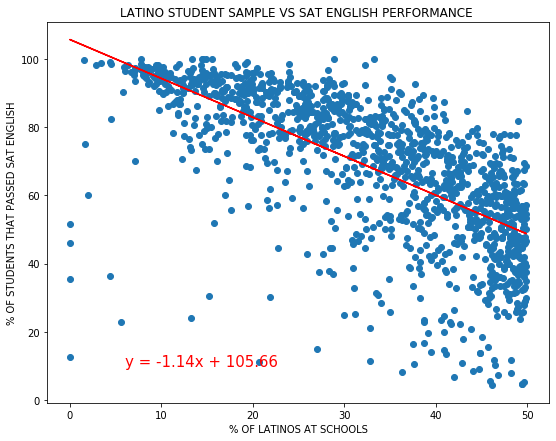

The r-squared is: 0.455
The p-value is: 0.0


In [40]:
# scatter showing test group (Latinos) that met or exceed scores performance standards - English portion.
# Print out the r-squared value along with the plot.
x_values = sat_df['LATINO_PERCENT']
y_values = sat_df['PCNT_ELA_PASS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.title('LATINO STUDENT SAMPLE VS SAT ENGLISH PERFORMANCE ')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('% OF LATINOS AT SCHOOLS')
plt.ylabel('% OF STUDENTS THAT PASSED SAT ENGLISH')
plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The p-value is: {round(pvalue, 3)}")

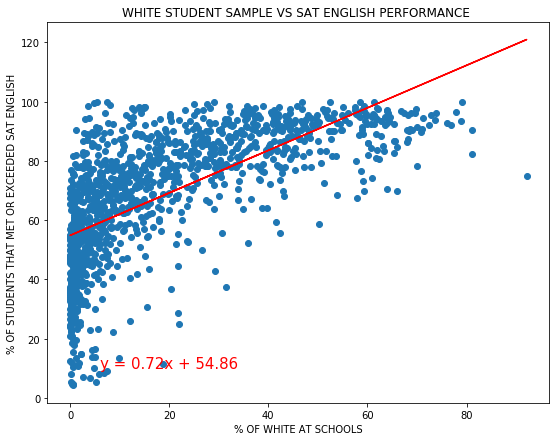

The r-squared is: 0.436
The p-value is: 0.0


In [41]:
#scatter showing comparison group (ie, Whites) that met or exceed scores performance standards - English portion.
# Print out the r-squared value along with the plot.
x_values = sat_df['WHITE_PERCENT']
y_values = sat_df['PCNT_ELA_PASS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.title('WHITE STUDENT SAMPLE VS SAT ENGLISH PERFORMANCE ')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('% OF WHITE AT SCHOOLS')
plt.ylabel('% OF STUDENTS THAT MET OR EXCEEDED SAT ENGLISH')
plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The p-value is: {round(pvalue, 3)}")

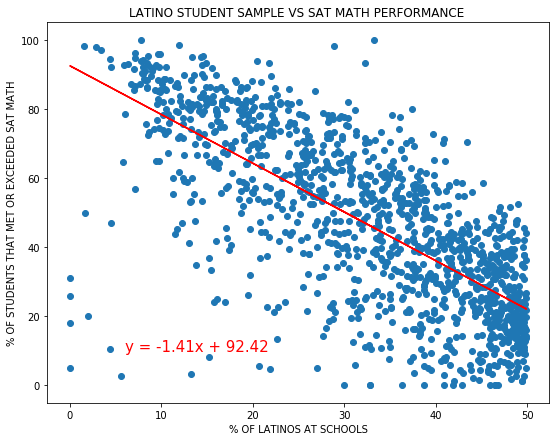

The r-squared is: 0.524
The p-value is: 0.0


In [42]:
# scatter showing test group (Latinos) that met or exceed scores performance standards - Math portion.
# Print out the r-squared value along with the plot.
x_values = sat_df['LATINO_PERCENT']
y_values = sat_df['PCNT_MATH_PASS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.title('LATINO STUDENT SAMPLE VS SAT MATH PERFORMANCE ')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('% OF LATINOS AT SCHOOLS')
plt.ylabel('% OF STUDENTS THAT MET OR EXCEEDED SAT MATH')
plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The p-value is: {round(pvalue, 3)}")

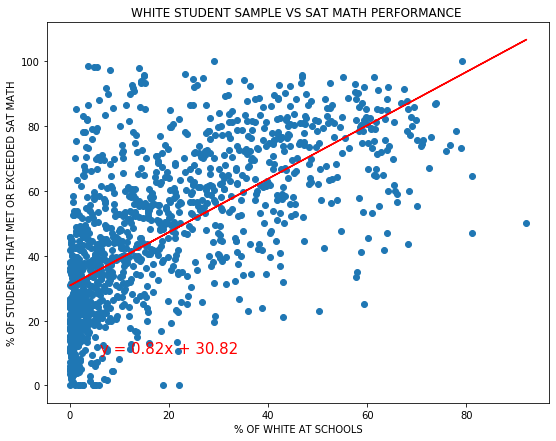

The r-squared is: 0.434
The p-value is: 0.0


In [43]:
# scatter showing comparison group (ie, White) that met or exceed scores performance standards - Math portion.
# Print out the r-squared value along with the plot.
x_values = sat_df['WHITE_PERCENT']
y_values = sat_df['PCNT_MATH_PASS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.title('WHITE STUDENT SAMPLE VS SAT MATH PERFORMANCE ')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('% OF WHITE AT SCHOOLS')
plt.ylabel('% OF STUDENTS THAT MET OR EXCEEDED SAT MATH')
plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The p-value is: {round(pvalue, 3)}")

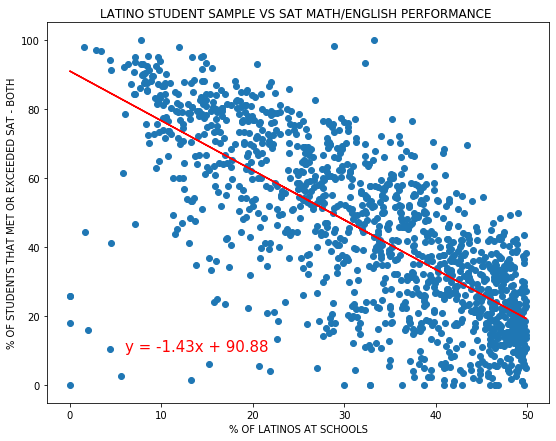

The r-squared is: 0.539
The p-value is: 0.0


In [44]:
# scatter showing test group (Latinos) that met or exceed scores performance standards - Both portions.
# Print out the r-squared value along with the plot.
x_values = sat_df['LATINO_PERCENT']
y_values = sat_df['PCNT_BOTH_PASS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.title('LATINO STUDENT SAMPLE VS SAT MATH/ENGLISH PERFORMANCE ')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('% OF LATINOS AT SCHOOLS')
plt.ylabel('% OF STUDENTS THAT MET OR EXCEEDED SAT - BOTH')
plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The p-value is: {round(pvalue, 3)}")

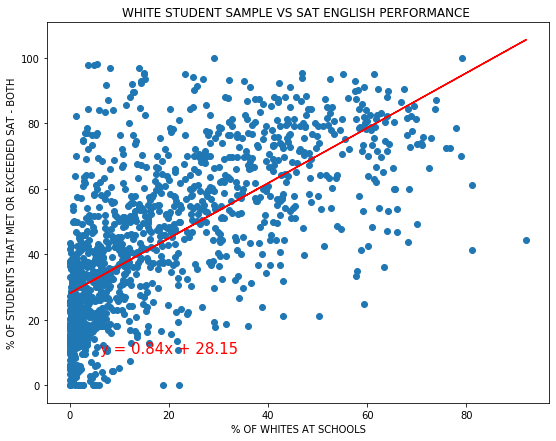

The r-squared is: 0.449
The p-value is: 0.0


In [45]:
# scatter showing comparison group (ie, Whites) that met or exceed scores performance standards - Both portions.
# Print out the r-squared value along with the plot.
x_values = sat_df['WHITE_PERCENT']
y_values = sat_df['PCNT_BOTH_PASS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.title('WHITE STUDENT SAMPLE VS SAT ENGLISH PERFORMANCE ')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('% OF WHITES AT SCHOOLS')
plt.ylabel('% OF STUDENTS THAT MET OR EXCEEDED SAT - BOTH')
plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The p-value is: {round(pvalue, 3)}")

In [38]:
### -- END OF ANALYSIS -- ###